In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pytz

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/individual-dataset/Fangzhou Ye_494878.csv
/kaggle/input/individual-dataset/Logan Wu_726867.csv
/kaggle/input/individual-dataset/Tingyu Zhou_663516.csv
/kaggle/input/individual-dataset/Luke Zhu_701255.csv


In [2]:
cdata = pd.read_csv('/kaggle/input/individual-dataset/Tingyu Zhou_663516.csv')
zdata = pd.read_csv('/kaggle/input/individual-dataset/Fangzhou Ye_494878.csv')
ldata = pd.read_csv('/kaggle/input/individual-dataset/Logan Wu_726867.csv')
lukedata = pd.read_csv('/kaggle/input/individual-dataset/Luke Zhu_701255.csv')
lukedata.head(10)

,canvas_user_id,name,id,type,action,event_time,ed_app,course_offering_id,session_id,statement_type,...,event__object_type,event__object_name,event__object_extensions_asset_name,event__object_extensions_asset_type,event__object_extensions_asset_subtype,event__object_extensions_entity_id,event__object_extensions_http_method,event__referrer,event__extensions_request_id,event__extensions_request_url
0,701255,Luke Zhu,urn:uuid:45150de5-c25d-40f0-bec3-23c997cf9185,NavigationEvent,navigatedto,2023-09-06T17:11:23.534Z,http://canvas.ubc.ca/,112240000000123363,urn:instructure:canvas:session:9911f4d80a26faf...,caliper,...,Entity,home,COMR 465 102 2023W1 Marketing Management,course,home,112240000000123363,GET,https://canvas.ubc.ca/courses,3d8015d7-968a-4bd2-bdf4-930efcead393,https://canvas.ubc.ca/courses/123363
1,701255,Luke Zhu,urn:uuid:ae4796fc-8df4-4736-9c84-d01a84f9a8bb,NavigationEvent,navigatedto,2023-09-06T17:11:46.090Z,http://canvas.ubc.ca/,112240000000123363,urn:instructure:canvas:session:9911f4d80a26faf...,caliper,...,Entity,syllabus,COMR 465 102 2023W1 Marketing Management,course,syllabus,112240000000123363,GET,https://canvas.ubc.ca/courses/123363,21aacad8-01a4-4bee-af5d-e6a41f7df808,https://canvas.ubc.ca/courses/123363/assignmen...
2,701255,Luke Zhu,urn:uuid:0a1dc659-391b-4e09-a969-03879e6d56f2,NavigationEvent,navigatedto,2023-09-06T18:54:18.805Z,http://canvas.ubc.ca/,112240000000123363,urn:instructure:canvas:session:9911f4d80a26faf...,caliper,...,Entity,home,COMR 465 102 2023W1 Marketing Management,course,home,112240000000123363,GET,https://canvas.ubc.ca/courses/123363/assignmen...,99abbf69-7035-41af-b1f3-232d380a2b0c,https://canvas.ubc.ca/courses/123363
3,701255,Luke Zhu,urn:uuid:bda0dccc-dc7b-4576-8c0b-9fabc92923be,NavigationEvent,navigatedto,2023-09-09T16:07:34.672Z,http://canvas.ubc.ca/,112240000000123363,urn:instructure:canvas:session:691ee23236b3e58...,caliper,...,Entity,home,COMR 465 102 2023W1 Marketing Management,course,home,112240000000123363,GET,https://canvas.ubc.ca/,3c565d3f-5360-4707-9d92-6eb2a956cef9,https://canvas.ubc.ca/courses/123363
4,701255,Luke Zhu,urn:uuid:0354e38d-93e4-43cd-9ef1-d6509b65f133,NavigationEvent,navigatedto,2023-09-09T16:40:33.544Z,http://canvas.ubc.ca/,112240000000115694,urn:instructure:canvas:session:691ee23236b3e58...,caliper,...,Entity,home,Science Co-op Workshops Winter 2023,course,home,112240000000115694,GET,https://canvas.ubc.ca/courses/123363,9a869b21-7e94-4d72-b3b1-cbcbb921a462,https://canvas.ubc.ca/courses/115694
5,701255,Luke Zhu,urn:uuid:890f9d50-4944-4d0e-a50a-bf8c7d383856,NavigationEvent,navigatedto,2023-09-09T16:40:36.378Z,http://canvas.ubc.ca/,112240000000115694,urn:instructure:canvas:session:691ee23236b3e58...,caliper,...,Entity,modules,Science Co-op Workshops Winter 2023,course,modules,112240000000115694,GET,https://canvas.ubc.ca/courses/115694,506ec5b3-1a1d-4a4b-949b-e4a841c837ad,https://canvas.ubc.ca/courses/115694/modules
6,701255,Luke Zhu,urn:uuid:782d22c8-f37b-4af1-ac74-ac76f53338e2,NavigationEvent,navigatedto,2023-09-09T16:40:57.172Z,http://canvas.ubc.ca/,112240000000115694,urn:instructure:canvas:session:691ee23236b3e58...,caliper,...,Page,NaN,Module 5: Achieving Success in the Workplace (...,wiki_page,NaN,112240000002001947,GET,https://canvas.ubc.ca/courses/115694/modules,313e2c2b-e858-4405-b3f3-1705dc486443,https://canvas.ubc.ca/courses/115694/pages/mod...
7,701255,Luke Zhu,urn:uuid:0dd5f5df-438f-4afe-ab6c-9e097c7b2ee0,NavigationEvent,navigatedto,2023-09-11T01:59:19.683Z,http://canvas.ubc.ca/,112240000000123363,urn:instructure:canvas:session:b785a1f06a0668b...,caliper,...,Entity,home,COMR 465 102 2023W1 Marketing Management,course,home,112240000000123363,GET,NaN,ebe99318-eb6c-4586-ac22-ad7baeeb15f9,https://canvas.ubc.ca/api/v1/courses/123363?in...
8,701255,Luke Zhu,urn:uuid:9609c369-ebbf-4193-98d6-cbfd6bc45ede,NavigationEvent,navigatedto,2023-09-11T06:14:58.785Z,http://canvas.ubc.ca/,112240000000123363,urn:instructure:canvas:session:e84055a65ed3bb4...,caliper,...,Ent

In [3]:
df = pd.DataFrame(cdata)

# Group by course_offering_id and create separate tables
grouped = df.groupby(['course_offering_id']).size().reset_index(name='row_count')
grouped = grouped.assign(course_name=['co-op permit','co-op workshop','commerce','cpsc 302','cpsc 304','fren 101','math 300','math 302','hackthon'])
print(grouped)

   course_offering_id  row_count     course_name
0  112240000000050528          6    co-op permit
1  112240000000121504         34  co-op workshop
2  112240000000123355        877        commerce
3  112240000000123425        494        cpsc 302
4  112240000000123426        813        cpsc 304
5  112240000000124440        100        fren 101
6  112240000000125194        707        math 300
7  112240000000125195          1        math 302
8  112240000000138358         74        hackthon


In [4]:
df1 = pd.DataFrame(zdata)

grouped1 = df1.groupby(['course_offering_id']).size().reset_index(name='row_count')
grouped1 = grouped1.assign(course_name=['math 317','cpsc 302','math 307','stat 301','stat 344','stat 404','stat 406','math','hackthon'])
print(grouped1)

   course_offering_id  row_count course_name
0  112240000000119096          4    math 317
1  112240000000123425        837    cpsc 302
2  112240000000125197        316    math 307
3  112240000000126185        511    stat 301
4  112240000000126189        468    stat 344
5  112240000000126192        678    stat 404
6  112240000000126193        328    stat 406
7  112240000000137920          3        math
8  112240000000138358        181    hackthon


In [5]:
df2 = pd.DataFrame(ldata)

grouped2 = df2.groupby(['course_offering_id']).size().reset_index(name='row_count')
grouped2 = grouped2.assign(course_name=['math 317','cpsc 302','math 307','stat 301','stat 344','stat 404','stat 406','math','hackthon'])
print(grouped2)

   course_offering_id  row_count course_name
0  112240000000091810          3    math 317
1  112240000000106356          1    cpsc 302
2  112240000000122590        247    math 307
3  112240000000123435        318    stat 301
4  112240000000123439        256    stat 344
5  112240000000123441         30    stat 404
6  112240000000125197        327    stat 406
7  112240000000126181        398        math
8  112240000000138358        104    hackthon


In [6]:
df3 = pd.DataFrame(lukedata)

grouped3 = df3.groupby(['course_offering_id']).size().reset_index(name='row_count')
grouped3 = grouped3.assign(course_name=['SCOP-W23','Canvas 101','COMR 465','hackthon'])
print(grouped3)

   course_offering_id  row_count course_name
0  112240000000000025        194    SCOP-W23
1  112240000000115694          5  Canvas 101
2  112240000000123363        462    COMR 465
3  112240000000138358        104    hackthon


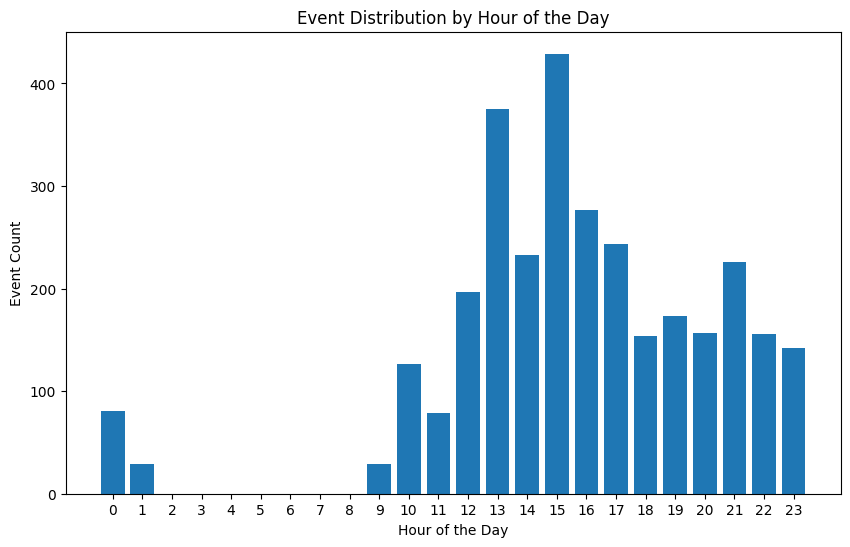

Most active hour of the day: 15
Event count in the most active time period: 429


In [7]:
df['event_time'] = pd.to_datetime(df['event_time'])

# Create a 'hour_of_day' column
pacific_timezone = pytz.timezone('America/Los_Angeles')
df['event_time'] = df['event_time'].dt.tz_convert(pacific_timezone)
df['hour_of_day'] = df['event_time'].dt.hour

# Group by 'hour_of_day' and count events
time_period_counts = df['hour_of_day'].value_counts().reset_index()
time_period_counts.columns = ['hour_of_day', 'event_count']

# Find the most active time period
most_active_time = time_period_counts.loc[time_period_counts['event_count'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(time_period_counts['hour_of_day'], time_period_counts['event_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Event Distribution by Hour of the Day')
plt.xticks(range(24))
plt.show()
print("Most active hour of the day:", most_active_time['hour_of_day'])
print("Event count in the most active time period:", most_active_time['event_count'])

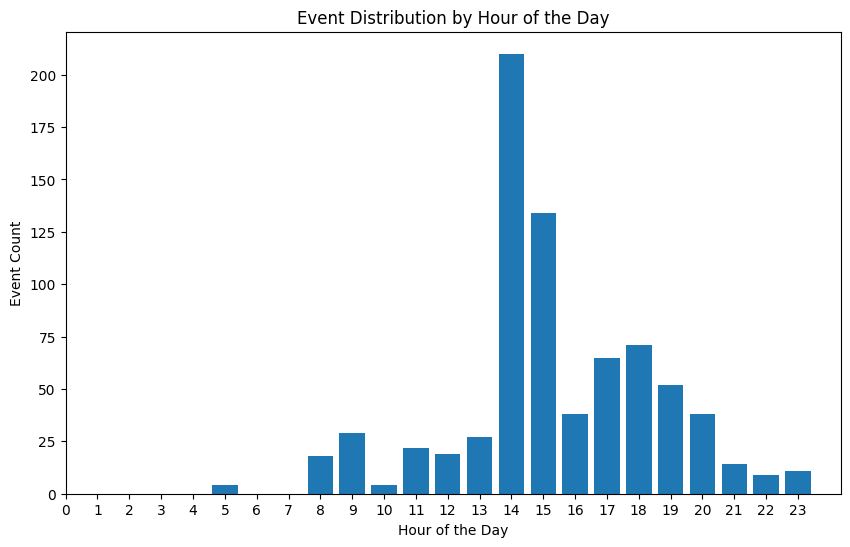

Most active hour of the day: 14
Event count in the most active time period: 210


In [8]:
df3['event_time'] = pd.to_datetime(df3['event_time'])

# Create a 'hour_of_day' column
pacific_timezone = pytz.timezone('America/Los_Angeles')
df3['event_time'] = df3['event_time'].dt.tz_convert(pacific_timezone)
df3['hour_of_day'] = df3['event_time'].dt.hour

# Group by 'hour_of_day' and count events
time_period_counts = df3['hour_of_day'].value_counts().reset_index()
time_period_counts.columns = ['hour_of_day', 'event_count']

# Find the most active time period
most_active_time = time_period_counts.loc[time_period_counts['event_count'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(time_period_counts['hour_of_day'], time_period_counts['event_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Event Distribution by Hour of the Day')
plt.xticks(range(24))
plt.show()
print("Most active hour of the day:", most_active_time['hour_of_day'])
print("Event count in the most active time period:", most_active_time['event_count'])

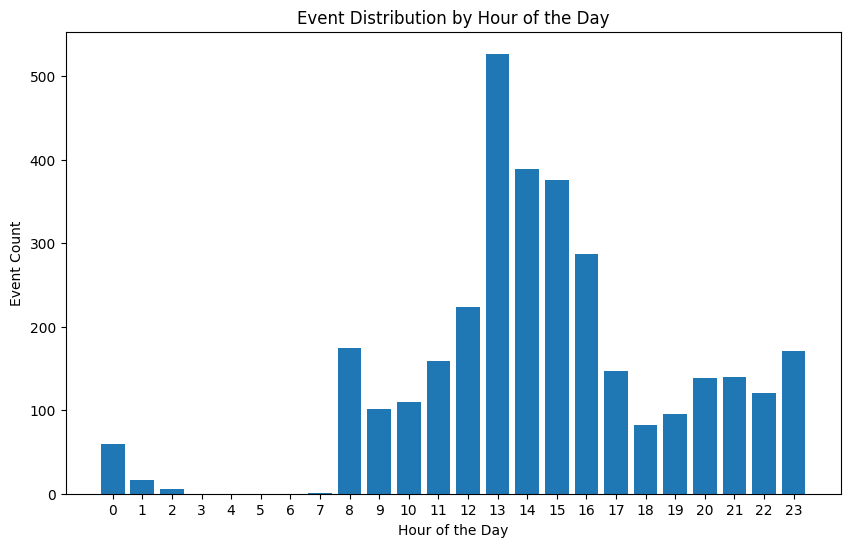

Most active hour of the day: 13
Event count in the most active time period: 527


In [9]:
df1['event_time'] = pd.to_datetime(df1['event_time'])

# Create a 'hour_of_day' column
pacific_timezone = pytz.timezone('America/Los_Angeles')
df1['event_time'] = df1['event_time'].dt.tz_convert(pacific_timezone)
df1['hour_of_day'] = df1['event_time'].dt.hour

# Group by 'hour_of_day' and count events
time_period_counts = df1['hour_of_day'].value_counts().reset_index()
time_period_counts.columns = ['hour_of_day', 'event_count']

# Find the most active time period
most_active_time = time_period_counts.loc[time_period_counts['event_count'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(time_period_counts['hour_of_day'], time_period_counts['event_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Event Distribution by Hour of the Day')
plt.xticks(range(24))
plt.show()
print("Most active hour of the day:", most_active_time['hour_of_day'])
print("Event count in the most active time period:", most_active_time['event_count'])

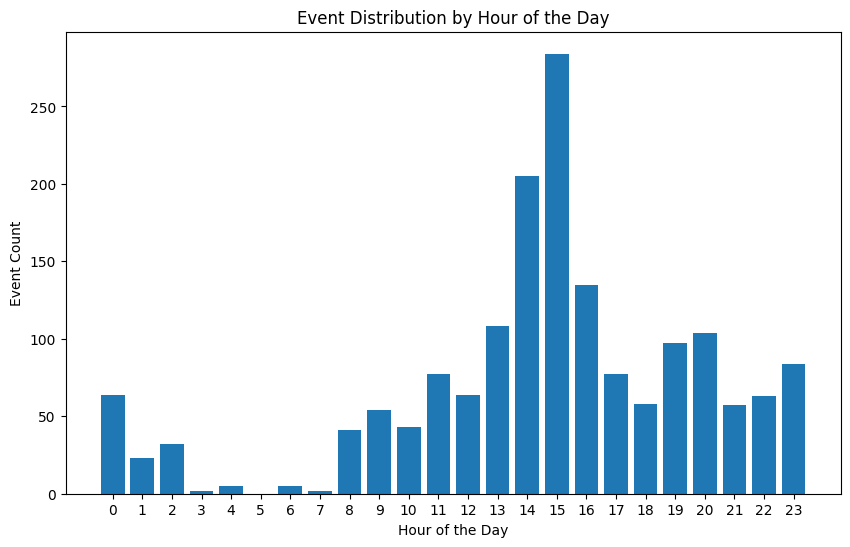

Most active hour of the day: 15
Event count in the most active time period: 284


In [10]:
df2['event_time'] = pd.to_datetime(df2['event_time'])

# Create a 'hour_of_day' column
pacific_timezone = pytz.timezone('America/Los_Angeles')
df2['event_time'] = df2['event_time'].dt.tz_convert(pacific_timezone)
df2['hour_of_day'] = df2['event_time'].dt.hour

# Group by 'hour_of_day' and count events
time_period_counts = df2['hour_of_day'].value_counts().reset_index()
time_period_counts.columns = ['hour_of_day', 'event_count']

# Find the most active time period
most_active_time = time_period_counts.loc[time_period_counts['event_count'].idxmax()]
plt.figure(figsize=(10, 6))
plt.bar(time_period_counts['hour_of_day'], time_period_counts['event_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Event Distribution by Hour of the Day')
plt.xticks(range(24))
plt.show()
print("Most active hour of the day:", most_active_time['hour_of_day'])
print("Event count in the most active time period:", most_active_time['event_count'])

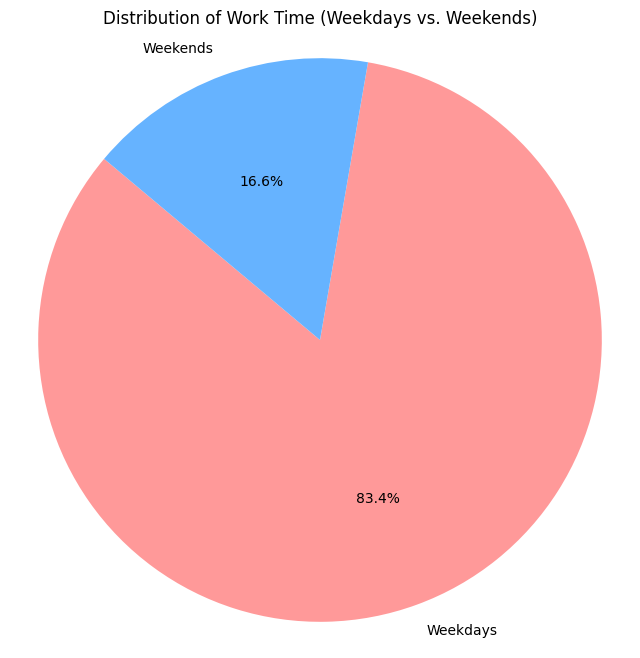

In [11]:
df['is_weekend'] = df['event_time'].dt.dayofweek >= 5

# Calculate the count of events on weekends and weekdays
event_counts = df['is_weekend'].value_counts()
weekend_count = event_counts[True] if True in event_counts else 0
weekday_count = event_counts[False] if False in event_counts else 0

# Create a pie chart to visualize the distribution
labels = ['Weekdays', 'Weekends']
sizes = [weekday_count, weekend_count]
colors = ['#ff9999', '#66b3ff']  # Colors for the pie chart

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Work Time (Weekdays vs. Weekends)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

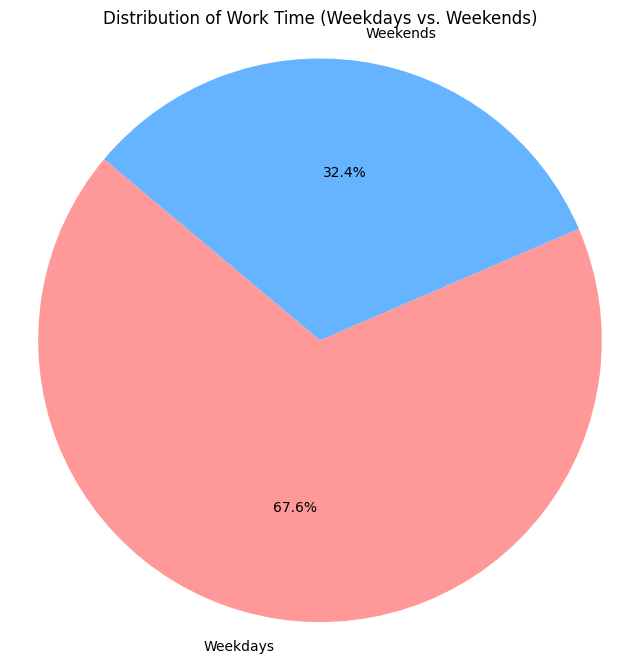

In [12]:
df3['is_weekend'] = df3['event_time'].dt.dayofweek >= 5

# Calculate the count of events on weekends and weekdays
event_counts = df3['is_weekend'].value_counts()
weekend_count = event_counts[True] if True in event_counts else 0
weekday_count = event_counts[False] if False in event_counts else 0

# Create a pie chart to visualize the distribution
labels = ['Weekdays', 'Weekends']
sizes = [weekday_count, weekend_count]
colors = ['#ff9999', '#66b3ff']  # Colors for the pie chart

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Work Time (Weekdays vs. Weekends)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

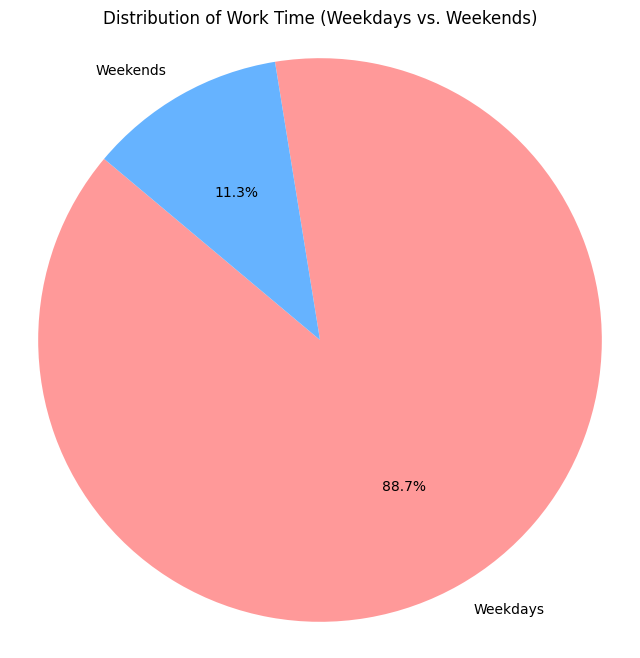

In [13]:
df1['is_weekend'] = df1['event_time'].dt.dayofweek >= 5

# Calculate the count of events on weekends and weekdays
event_counts = df1['is_weekend'].value_counts()
weekend_count = event_counts[True] if True in event_counts else 0
weekday_count = event_counts[False] if False in event_counts else 0

# Create a pie chart to visualize the distribution
labels = ['Weekdays', 'Weekends']
sizes = [weekday_count, weekend_count]
colors = ['#ff9999', '#66b3ff']  # Colors for the pie chart

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Work Time (Weekdays vs. Weekends)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

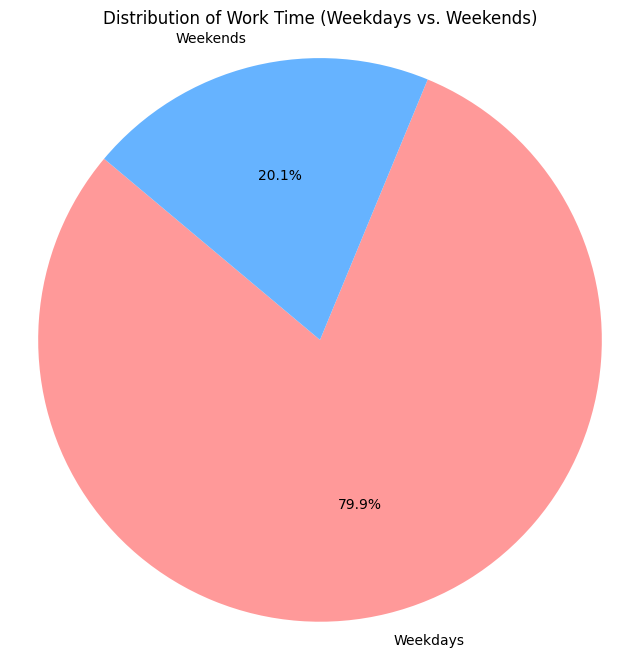

In [14]:
df2['is_weekend'] = df2['event_time'].dt.dayofweek >= 5

# Calculate the count of events on weekends and weekdays
event_counts = df2['is_weekend'].value_counts()
weekend_count = event_counts[True] if True in event_counts else 0
weekday_count = event_counts[False] if False in event_counts else 0

# Create a pie chart to visualize the distribution
labels = ['Weekdays', 'Weekends']
sizes = [weekday_count, weekend_count]
colors = ['#ff9999', '#66b3ff']  # Colors for the pie chart

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Work Time (Weekdays vs. Weekends)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

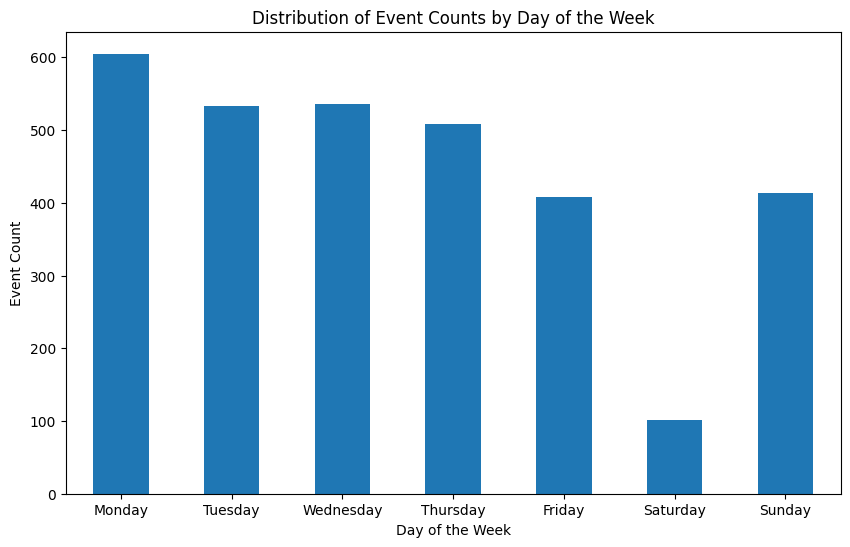

In [15]:
df['day_of_week'] = df['event_time'].dt.strftime('%A')

# Group by 'day_of_week' and count events on each day
daily_event_counts = df['day_of_week'].value_counts()

# Define the order of days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
daily_event_counts[days_of_week_order].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Event Count')
plt.title('Distribution of Event Counts by Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

plt.show()

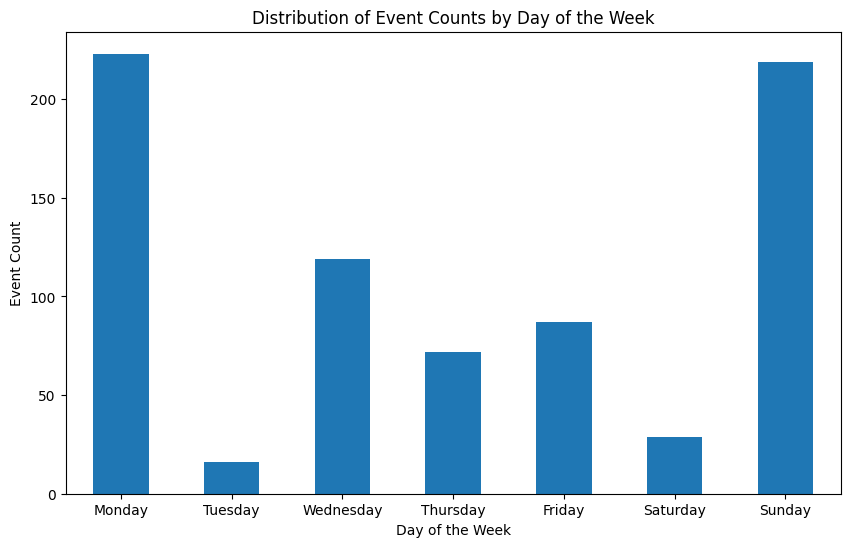

In [16]:
df3['day_of_week'] = df3['event_time'].dt.strftime('%A')

# Group by 'day_of_week' and count events on each day
daily_event_counts = df3['day_of_week'].value_counts()

# Define the order of days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
daily_event_counts[days_of_week_order].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Event Count')
plt.title('Distribution of Event Counts by Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

plt.show()

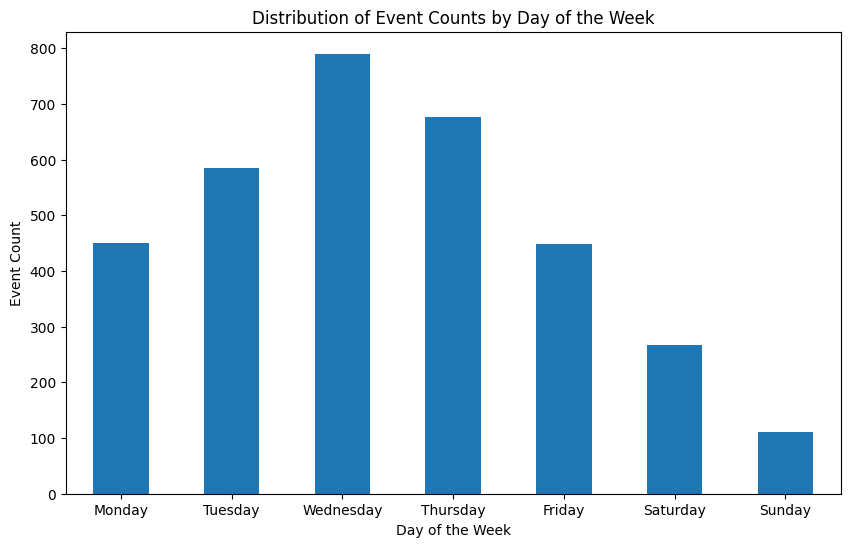

In [17]:
df1['day_of_week'] = df1['event_time'].dt.strftime('%A')

# Group by 'day_of_week' and count events on each day
daily_event_counts = df1['day_of_week'].value_counts()

# Define the order of days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
daily_event_counts[days_of_week_order].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Event Count')
plt.title('Distribution of Event Counts by Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

plt.show()

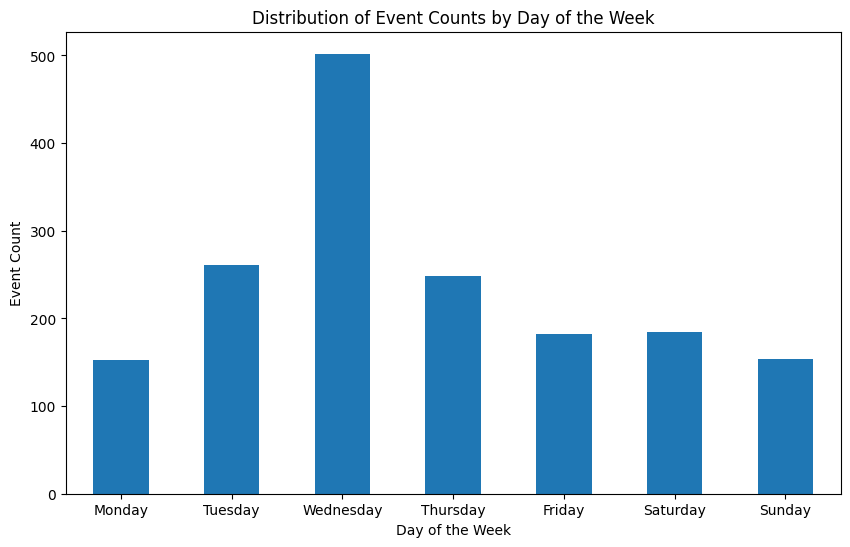

In [18]:
df2['day_of_week'] = df2['event_time'].dt.strftime('%A')

# Group by 'day_of_week' and count events on each day
daily_event_counts = df2['day_of_week'].value_counts()

# Define the order of days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
daily_event_counts[days_of_week_order].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Event Count')
plt.title('Distribution of Event Counts by Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

plt.show()

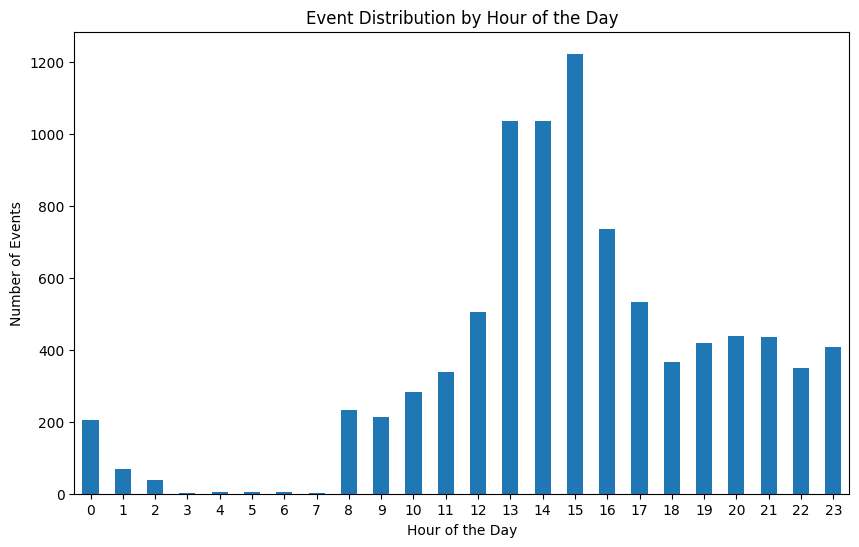

In [19]:
# file_paths = [df,df1,df2,df3]
# dfs = [pd.read_csv(file) for file in file_paths]
# combined_df = pd.concat(dfs, ignore_index=True)
# combined_df['event_time'] = pd.to_datetime(combined_df['event_time'])
# combined_df['hour'] = combined_df['event_time'].dt.hour
# hourly_event_counts = combined_df.groupby('hour').size()
# hourly_event_counts.plot(kind='bar', figsize=(10, 6))
# plt.xlabel('Hour of the Day')
# plt.ylabel('Number of Events')
# plt.title('Event Distribution by Hour of the Day')
# plt.xticks(range(24))  # Ensure x-axis ticks represent all 24 hours
# plt.show()

# ---------------------------------------------------------------------------------

# Combine the DataFrames into one DataFrame
dfs = [df1, df2, df3, df]
combined_df = pd.concat(dfs)
# Convert the 'event_time' column to a datetime format
combined_df['event_time'] = pd.to_datetime(combined_df['event_time'])
# Create a new column that extracts the hour from the 'event_time' column
combined_df['hour'] = combined_df['event_time'].dt.hour
# Group the data by the 'hour' column and count the number of events for each hour
hourly_event_counts = combined_df.groupby('hour').size()
# Plot the data using a bar chart
hourly_event_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.title('Event Distribution by Hour of the Day')
plt.xticks(range(24))  # Ensure x-axis ticks represent all 24 hours
plt.xticks(rotation=0)
plt.show()


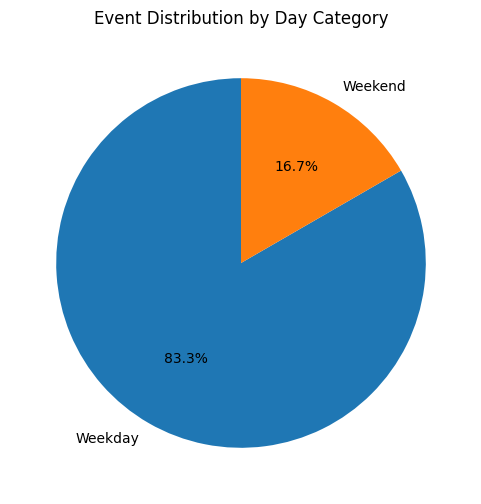

In [20]:


# Assuming you have 4 DataFrames named df1, df2, df3, and df4

# Combine the DataFrames into one DataFrame
dfs = [df1, df2, df3, df]
combined_df = pd.concat(dfs)

# Convert the 'event_time' column to a datetime format
combined_df['event_time'] = pd.to_datetime(combined_df['event_time'])

# Create a new column that extracts the day of the week (0=Monday, 6=Sunday)
combined_df['day_of_week'] = combined_df['event_time'].dt.dayofweek

# Define a function to categorize days as weekdays or weekends
def categorize_day(day):
    if day < 5:  # Monday to Friday
        return 'Weekday'
    else:  # Saturday and Sunday
        return 'Weekend'

# Apply the categorize_day function to create a 'day_category' column
combined_df['day_category'] = combined_df['day_of_week'].apply(categorize_day)

# Group the data by 'day_category' and count the number of events in each category
day_category_counts = combined_df['day_category'].value_counts()

# Plot the data using a pie chart
day_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Event Distribution by Day Category')
plt.ylabel('')  # Remove the default ylabel
plt.show()
